<a href="https://colab.research.google.com/github/TKph/colab/blob/main/K_means%E3%81%AB%E3%81%8A%E3%82%8B%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# データの準備


---



In [ ]:
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=1500, n_features=2, centers=2, random_state=2)

X[:, 0] = X[:, 0] * 10

plt.scatter(X[:, 0], X[:, 1])
plt.title("Blobs Data")
plt.show()



---
# k-meansの実装 (正規化あり)





---



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_norm = MinMaxScaler().fit_transform(X) #正規化

kmeans = KMeans(n_clusters=2, random_state=0) #適用
y_pred = kmeans.fit_predict(X_norm)

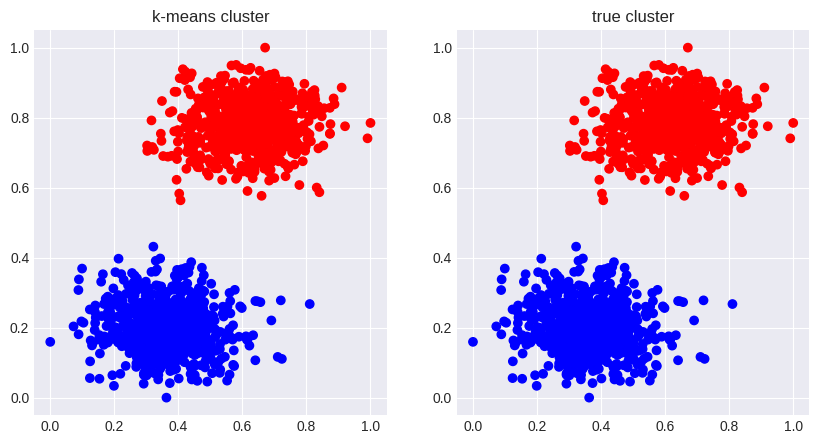

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=~y_pred, cmap='bwr')  #y_predは配列であり, 各データについてのラベルが入っている. 今回であれば0or1である.
plt.title("k-means cluster")
plt.subplot(122)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap='bwr')
plt.title("true cluster")
plt.show()



---


# k-meansの実装 (正規化なし)
---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


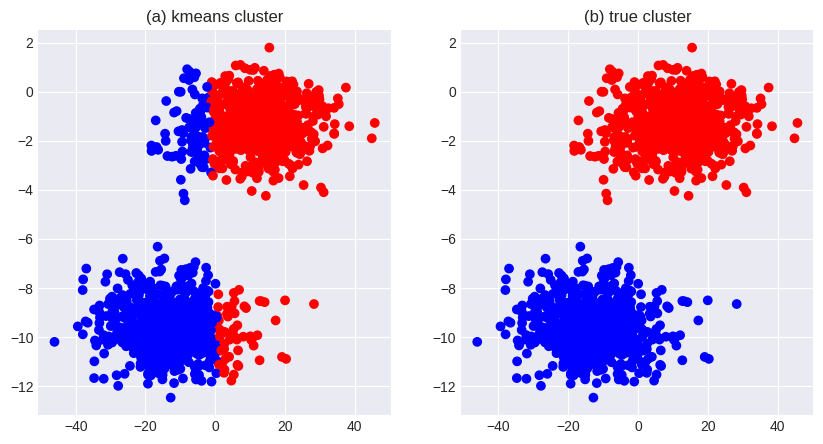

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X)

#可視化
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=~y_pred, cmap='bwr')
plt.title("(a) kmeans cluster")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("(b) true cluster")
plt.show()



---
# k-meansの説明

---




大きく分けて3ステップある.

ステップ1では, 分けたいクラスタの数だけランダムにデータを選択し, それを重心点とする.

ステップ2では, すべてのデータに対してそのデータから一番近い重心点に属させる.

$$ \sum_{i=0}^N \min_{class}((x_i-\mu_{class})^2) $$
()の中を最小にするclassを見つけ, $x_i$をそのclassに属させる.

ステップ3では, 重心点を再計算する. ステップ2によっていくつかのデータは属するクラスタが変わる. その後ステップ2に戻り, 収束するまで繰り返す.

---

ここで正規化していないデータがなぜうまくクラスタリングできないかを説明する.
先のステップ2で出てきた式を見れば分かるが, このアルゴリズムではユークリッド距離で計算している. データのy座標が0から1に収まっていて, x座標は0から100だとすると, 軸によって距離の基準が異なる(基底がx軸とy軸で合っていない). よって, この場合x軸の広がりを優先したクラスタリングを行ってしまう.

---
おさらいとして正規化と標準化の基本的な変換方法を示す.

$$ X_{norm} = \frac{x_i - x_{min}}{x_{max} - x_{min}} $$

$$ X_{std}= \frac{x_i - \mu}{\sigma} $$

正規化は, まず座標軸の原点を$x_{min}$に合わせて$x_{max}$出割る. 標準化は平均を0, 分散を1にする. 正規化の場合外れ値の影響を受けやすいので, どちらの処理をするのかはデータによって異なってくる.

---

真のクラスタが楕円状に広がっている場合, 判断基準が距離しかないk-meansは適さない. その場合, ガウス混合モデルを, また, 多様体上にある場合は, t-SNEを適用しよう.

